# Random Forest Practice

In this notebook there is implementation of random forest from scratch based on previously implemented decision tree model

Link to decision tree from scratch practice - https://github.com/Maxstef/data-loves-ml-for-people-course/blob/main/notebooks/2_3_decision_tree/0_2_decision_tree_from_scratch.ipynb


## Classification

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from mlpeople.models.tree import DecisionTreeClassification
from mlpeople.models.ensemble import RandomForestClassification

### Binary Classification data

Use same data as in decision tree notebook and compare results

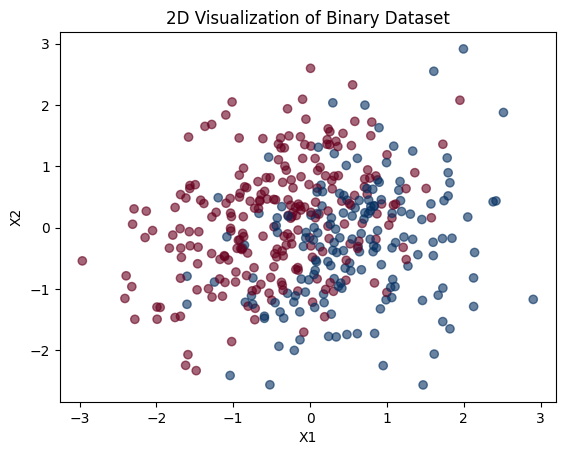

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from mlpeople.models.logistic import generate_logistic_regression_data

X_bin, y_bin, _ = generate_logistic_regression_data(
    n=400,
    p=2,
    intercept=-0.5,
    coefs=[2, -1],
    seed=42,
    sigma=2,
)

plt.scatter(
    X_bin[:, 0],
    X_bin[:, 1],
    c=y_bin,
    alpha=0.6,
    cmap="RdBu"
)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D Visualization of Binary Dataset")

plt.show()

In [11]:

from sklearn.model_selection import train_test_split

X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Train One decision tree
model_dt_binary = DecisionTreeClassification(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini"
)

model_dt_binary.fit(X_bin_train, y_bin_train)

# TrainRandom Forest
model_rm_binary = RandomForestClassification(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini",
    max_features=2, # since we have only 2 feature
)

model_rm_binary.fit(X_bin_train, y_bin_train)

def print_acc(model, X_train, X_test, y_train, y_test):
    # Predict train
    preds_train = model.predict(X_train)

    # Predict test
    preds_test = model.predict(X_test)

    # Accuracy train
    accuracy_train = np.mean(preds_train == y_train)
    print("Accuracy Train:", accuracy_train)

    # Accuracy test
    accuracy_test = np.mean(preds_test == y_test)
    print("Accuracy Test:", accuracy_test)

print("One Decision Tree:")
print_acc(model_dt_binary, X_bin_train, X_bin_test, y_bin_train, y_bin_test)

print("\nRandom Forest:")
print_acc(model_rm_binary, X_bin_train, X_bin_test, y_bin_train, y_bin_test)

One Decision Tree:
Accuracy Train: 0.871875
Accuracy Test: 0.6875

Random Forest:
Accuracy Train: 0.846875
Accuracy Test: 0.725


### Visualize Trees

Compare two random trees from forest

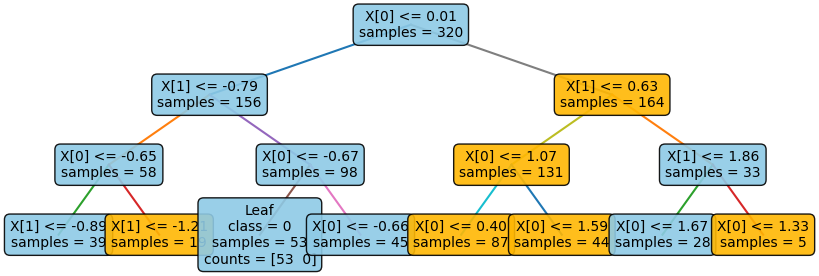

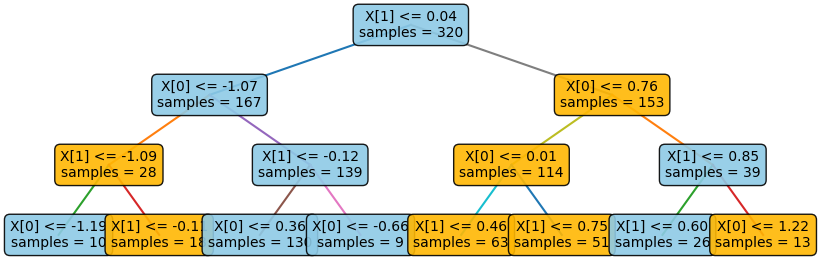

In [16]:
from mlpeople.models.tree.visualization import plot_tree_matplotlib

plot_tree_matplotlib(model_rm_binary.trees[0].tree, figsize=(10,3), max_depth=3)
plot_tree_matplotlib(model_rm_binary.trees[6].tree, figsize=(10,3), max_depth=3)

### Multiclass data

Create 2 features 4 classes noisy data and experiment with that.
In case we use less noise data one decision tree is enough and gives almost same result.

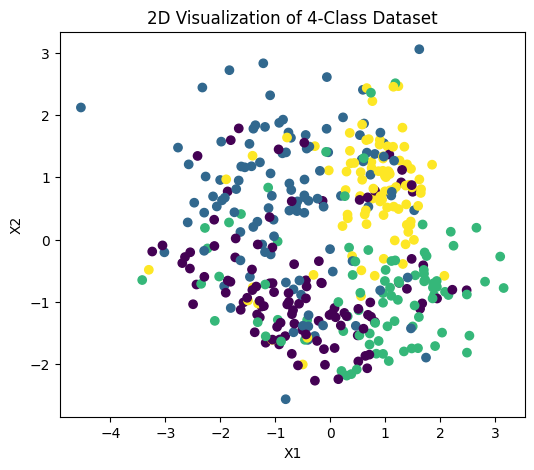

In [24]:
from mlpeople.visualization.classification.single_label import generate_2D_classification_data

X_mult4, y_mult4 = generate_2D_classification_data(n_samples=400, n_classes=4, flip_y=0.3)

In [25]:
X_mult4_train, X_mult4_test, y_mult4_train, y_mult4_test = train_test_split(X_mult4, y_mult4, test_size=0.2, random_state=42)

# One tree
model_dt_mult4 = DecisionTreeClassification(
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini"
)
model_dt_mult4.fit(X_mult4_train, y_mult4_train)

# Random Forest
model_rf_mult4 = RandomForestClassification(
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini",
    max_features=2,
)
model_rf_mult4.fit(X_mult4_train, y_mult4_train)

print("One Decision Tree:")
print_acc(model_dt_mult4, X_mult4_train, X_mult4_test, y_mult4_train, y_mult4_test)
print("\nRandom Forest:")
print_acc(model_rf_mult4, X_mult4_train, X_mult4_test, y_mult4_train, y_mult4_test)

One Decision Tree:
Accuracy Train: 0.775
Accuracy Test: 0.5375

Random Forest:
Accuracy Train: 0.75625
Accuracy Test: 0.6


### More than 2 features data

Now generate data with 20 features and compare the result of one tree and random forest

In [ ]:
X_bin_20, y_bin_20, _ = generate_logistic_regression_data(
    n=600,
    p=20,
    seed=42,
    sigma=2,
)

X_bin_20_train, X_bin_20_test, y_bin_20_train, y_bin_20_test = train_test_split(X_bin_20, y_bin_20, test_size=0.2, random_state=42)

# One tree
model_dt_bin_20 = DecisionTreeClassification(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini"
)
model_dt_bin_20.fit(X_bin_20_train, y_bin_20_train)

# Random Forest max_features="sqrt"
model_rf_bin_20_sqrt = RandomForestClassification(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini",
    max_features="sqrt", # now we can use "sqrt"
)
model_rf_bin_20_sqrt.fit(X_bin_20_train, y_bin_20_train)

# Random Forest max_features=10
model_rf_bin_20_10 = RandomForestClassification(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion="gini",
    max_features=10, # half of features
)
model_rf_bin_20_10.fit(X_bin_20_train, y_bin_20_train)

print("One Decision Tree:")
print_acc(model_dt_bin_20, X_bin_20_train, X_bin_20_test, y_bin_20_train, y_bin_20_test)
print("\nRandom Forest max_features=sqrt:")
print_acc(model_rf_bin_20_sqrt, X_bin_20_train, X_bin_20_test, y_bin_20_train, y_bin_20_test)
print("\nRandom Forest max_features=10:")
print_acc(model_rf_bin_20_sqrt, X_bin_20_train, X_bin_20_test, y_bin_20_train, y_bin_20_test)

One Decision Tree:
Accuracy Train: 0.9979166666666667
Accuracy Test: 0.6083333333333333

Random Forest max_features=sqrt:
Accuracy Train: 1.0
Accuracy Test: 0.7

Random Forest max_features=10:
Accuracy Train: 1.0
Accuracy Test: 0.7


### N estimators Experiment

Use data from previous experiment here

In [41]:
import pandas as pd

def n_estimator_error_rf(n):
    model = RandomForestClassification(n_estimators=n, random_state=42)
    model.fit(X_bin_20_train, y_bin_20_train)
    
    preds_train = model.predict(X_bin_20_train)
    accuracy_train = np.mean(preds_train == y_bin_20_train)
    train_err = 1 - accuracy_train

    preds_test = model.predict(X_bin_20_test)
    accuracy_test = np.mean(preds_test == y_bin_20_test)
    test_err = 1 - accuracy_test

    return {'N Estimators': n, 'Training Error': train_err, 'Validation Error': test_err}

In [42]:
%%time
n_estimator_errors_df = pd.DataFrame([n_estimator_error_rf(n) for n in range(10, 120, 10)])

CPU times: user 1min 3s, sys: 335 ms, total: 1min 4s
Wall time: 1min 5s


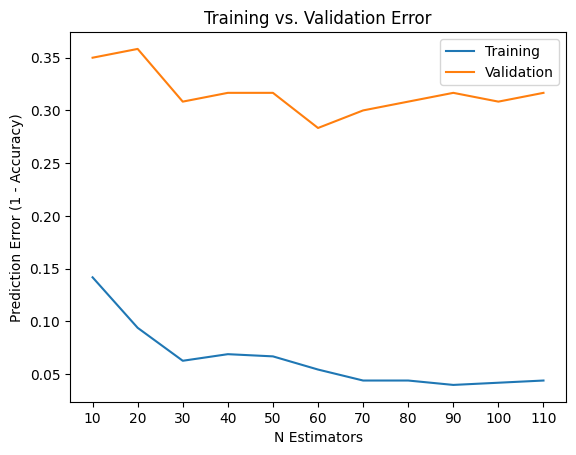

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(n_estimator_errors_df['N Estimators'], n_estimator_errors_df['Training Error'])
plt.plot(n_estimator_errors_df['N Estimators'], n_estimator_errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(10, 120, 10))
plt.xlabel('N Estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

## Regression

In [44]:
from mlpeople.models.tree import DecisionTreeRegression
from mlpeople.models.ensemble import RandomForestRegression

### 2D Regression

Same as in decision tree notebook

In [47]:
from mlpeople.models.linear import (
    generate_linear_regression_data,
    fit_ols,
    predict,
    rmse,
)

# Generate data
X_reg2, y_reg2, _ = generate_linear_regression_data(
    n=300, p=2, coefs=[2.0, -1.5], intercept=1.0, sigma=0.5, seed=42
)

X_reg2_train, X_reg2_test, y_reg2_train, y_reg2_test = train_test_split(X_reg2, y_reg2, test_size=0.2, random_state=42)

# Fit OLS to compare tree vs. linear regression
beta_hat = fit_ols(X_reg2_train, y_reg2_train, fit_intercept=True)

# predict train and test
y_lin_reg_pred_train = predict(X_reg2_train, beta_hat, fit_intercept=True)
y_lin_reg_pred_test = predict(X_reg2_test, beta_hat, fit_intercept=True)

print("OLS RMSE Train:", rmse(y_reg2_train, y_lin_reg_pred_train).round(2))
print("OLS RMSE Test:", rmse(y_reg2_test, y_lin_reg_pred_test).round(2))

# One decsion tree
model_dt_reg2 = DecisionTreeRegression(
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=3
)

model_dt_reg2.fit(X_reg2_train, y_reg2_train)

y_tree_reg_pred_train = model_dt_reg2.predict(X_reg2_train)
y_tree_reg_pred_test = model_dt_reg2.predict(X_reg2_test)

print("Tree RMSE Train:", rmse(y_reg2_train, y_tree_reg_pred_train).round(2))
print("Tree RMSE Test:", rmse(y_reg2_test, y_tree_reg_pred_test).round(2))

# Random forest
model_rf_reg2 = RandomForestRegression(
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features=2,
)

model_rf_reg2.fit(X_reg2_train, y_reg2_train)

y_rf_reg_pred_train = model_rf_reg2.predict(X_reg2_train)
y_rf_reg_pred_test = model_rf_reg2.predict(X_reg2_test)

print("Random Forest RMSE Train:", rmse(y_reg2_train, y_rf_reg_pred_train).round(2))
print("Random Forest RMSE Test:", rmse(y_reg2_test, y_rf_reg_pred_test).round(2))

OLS RMSE Train: 0.5
OLS RMSE Test: 0.49
Tree RMSE Train: 0.44
Tree RMSE Test: 0.91
Random Forest RMSE Train: 0.4
Random Forest RMSE Test: 0.77


### Search best hyperparam options

In [56]:
def get_result_for_params(ne, md, mss, msl):
    model = RandomForestRegression(
        n_estimators=ne,
        max_depth=md,
        min_samples_split=mss,
        min_samples_leaf=msl,
        max_features=2,
    )
    model.fit(X_reg2_train, y_reg2_train)

    y_pred_train = model.predict(X_reg2_train)
    y_pred_test = model.predict(X_reg2_test)

    rmse_train = rmse(y_reg2_train, y_pred_train)
    rmse_test = rmse(y_reg2_test, y_pred_test)

    return {
        'N estimators': ne,
        'Max Depth': md,
        'Min Samples Split': mss,
        'Min Samples Leaf': msl,
        'Training RMSE': rmse_train,
        'Test RMSE': rmse_test
    }

In [57]:
%%time
import pandas as pd

errors_df = pd.DataFrame([get_result_for_params(ne, md, mss, msl)  for ne in [5, 10, 20, 50] for md in range(5, 15, 2) for mss in range(1, 10, 2) for msl in range(1, 10, 2)])

CPU times: user 44.3 s, sys: 277 ms, total: 44.6 s
Wall time: 45.1 s


In [58]:
errors_df.sort_values("Test RMSE", ascending=True).head(10)

,N estimators,Max Depth,Min Samples Split,Min Samples Leaf,Training RMSE,Test RMSE
205,10,11,3,1,0.307833,0.687349
275,20,7,1,1,0.325036,0.701679
440,50,9,7,1,0.334250,0.711255
230,10,13,3,1,0.314910,0.716569
415,50,7,7,1,0.364936,0.718048
195,10,9,9,1,0.384919,0.719138
345,20,11,9,1,0.384016,0.719830
122,5,13,9,5,0.518536,0.721889
295,20,7,9,1,0.405160,0.725122
360,20,13,5,1,0.312531,0.725475
